In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:
with open("../ressources/dpo_rl_model_25-01-13_20x200/dataset.pickle", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df

,description,configuration,parameters,argos,type,scores_bt1,scores_bt2,bt1,bt2,scores_bt1_scaled,scores_bt2_scaled,chosen,rejected,score_chosen,score_rejected,dataset_position
0,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-2.617866,-2.693078,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,1.000000,0.999102,<s>[INST] The environment features a circle co...,<s>[INST] The environment features a circle co...,1.000000,0.999102,0
1,The rectangular area has dimensions 4.49 m x 7...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-6.084159,-7.468585,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.885733,0.855504,<s>[INST] The rectangular area has dimensions ...,<s>[INST] The rectangular area has dimensions ...,0.885733,0.855504,0
2,"With a radius of 3.54 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-13.6949,-16.43645,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.719549,0.659686,"<s>[INST] With a radius of 3.54 meters, the ci...","<s>[INST] With a radius of 3.54 meters, the ci...",0.719549,0.659686,0
3,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-16.89584,-27.5152,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.829468,0.702634,"<s>[INST] In this setting, a circular arena wi...","<s>[INST] In this setting, a circular arena wi...",0.829468,0.702634,0
4,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-13.786407,-15.47062,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.717551,0.680775,<s>[INST] The environment is constructed as a ...,<s>[INST] The environment is constructed as a ...,0.717551,0.680775,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,The environment consists of a circular arena w...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-16.03284,-14.17598,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.729693,0.766626,<s>[INST] The environment consists of a circul...,<s>[INST] The environment consists of a circul...,0.766626,0.729693,19
2160,The arena has a radius of 3.63 m. 4 lights are...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-27.91645,-29.30017,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.493330,0.465808,<s>[INST] The arena has a radius of 3.63 m. 4 ...,<s>[INST] The arena has a radius of 3.63 m. 4 ...,0.493330,0.465808,19
2161,"The circular arena, constructed with 15 walls,...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-12.381605,-8.610595,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.733664,0.820904,"<s>[INST] The circular arena, cons

In [5]:
df = original_df

In [6]:
df['average_score'] = (df['scores_bt1'] + df['scores_bt2']) / 2

# Step 2: Group by 'type' and 'dataset_position' and calculate the mean of the average scores
result = df.groupby(['dataset_position','type',])['average_score'].mean().reset_index()

# Display the result
print(result)

    dataset_position          type average_score
0                  0   Aggregation      0.271816
1                  0    Connection    -16.606622
2                  0  Distribution    -10.933074
3                  0      Foraging          1.25
4                  1   Aggregation      0.310757
..               ...           ...           ...
69                17  Distribution      -9.04372
70                18    Connection    -22.641592
71                18  Distribution     -6.240657
72                19    Connection    -14.830472
73                19  Distribution     -7.244071

[74 rows x 3 columns]


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

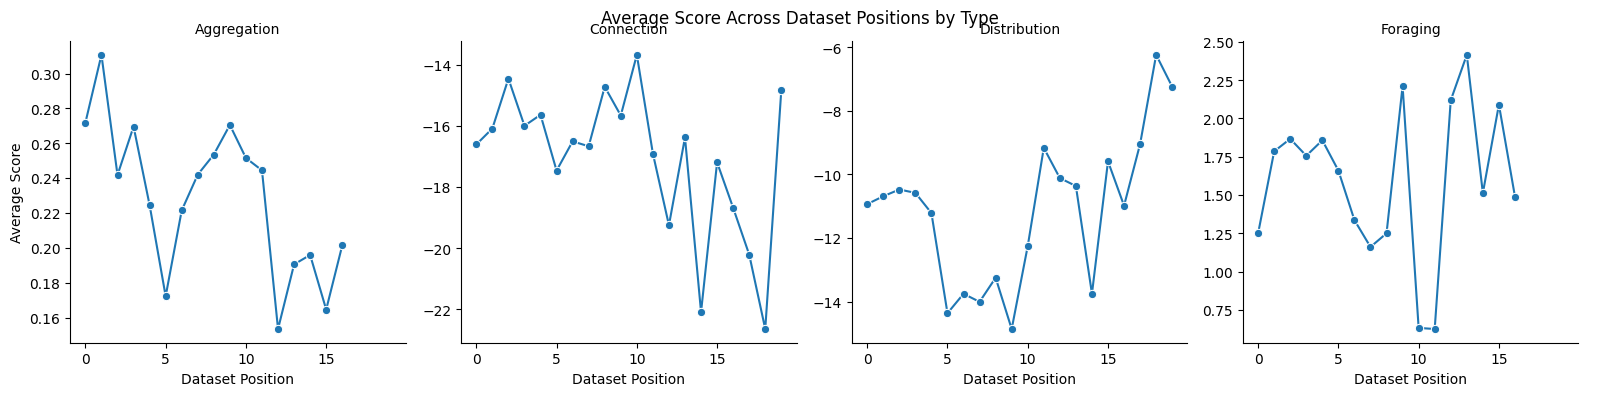

In [8]:
# Step 3: Create a FacetGrid using seaborn
g = sns.FacetGrid(result, col='type', col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, 'dataset_position', 'average_score', marker='o')

# Step 4: Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Dataset Position", "Average Score")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Score Across Dataset Positions by Type')
plt.show()

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site

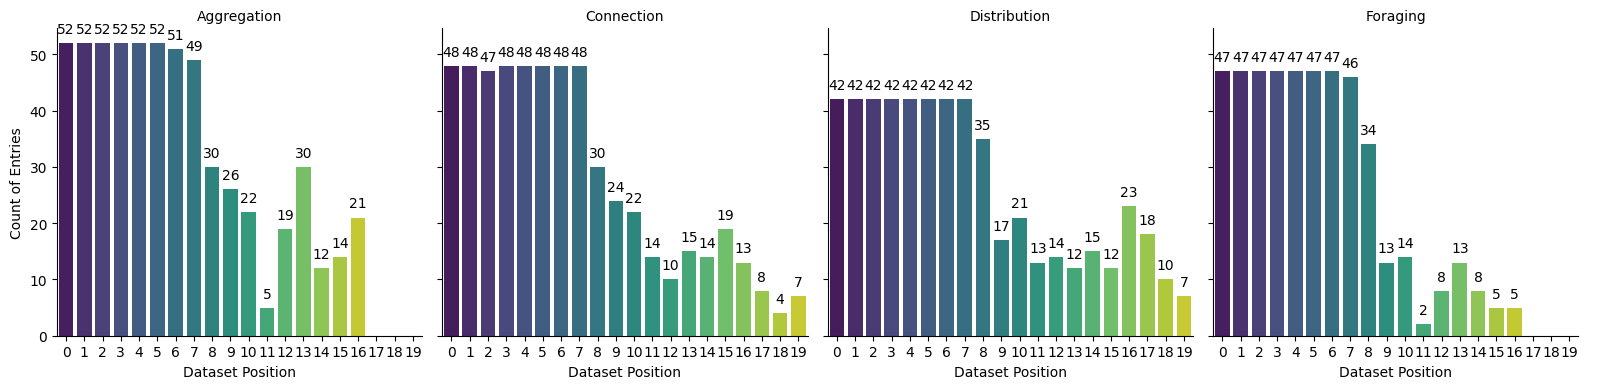

In [9]:
# Count non-null entries for each combination of type and dataset_position
length_counts = df.groupby(['type', 'dataset_position'])['average_score'].count().reset_index()
length_counts.columns = ['type', 'dataset_position', 'length']
g = sns.FacetGrid(length_counts, col='type', col_wrap=4, height=4)
bar_plot = g.map_dataframe(sns.barplot, x='dataset_position', y='length', palette='viridis')

# Annotate bars with the actual numbers
for ax in bar_plot.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points')

g.set_axis_labels("Dataset Position", "Count of Entries")
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()


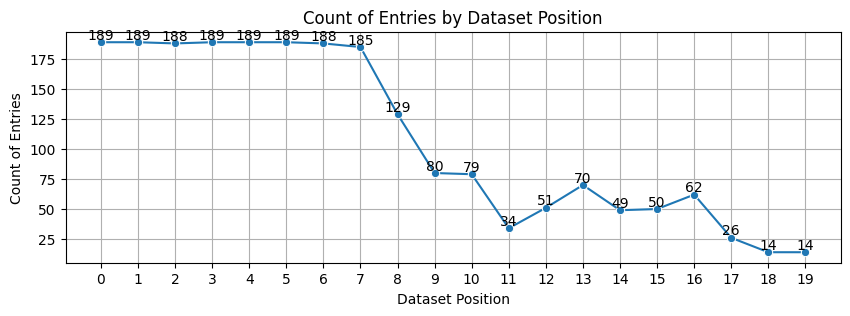

In [10]:
length_counts = df.groupby('dataset_position')['average_score'].count().reset_index()
length_counts.columns = ['dataset_position', 'length']
plt.figure(figsize=(10, 3))
line_plot = sns.lineplot(data=length_counts, x='dataset_position', y='length', marker='o')

# Annotate points with the actual numbers
for index, row in length_counts.iterrows():
    line_plot.text(row['dataset_position'], row['length'], 
                   f'{row["length"]}', 
                   color='black', 
                   ha='center', 
                   va='bottom')

plt.title('Count of Entries by Dataset Position')
plt.xlabel('Dataset Position')
plt.ylabel('Count of Entries')
plt.xticks(length_counts['dataset_position'])  # Ensure all dataset positions are shown
plt.grid()
plt.show()
